In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 71965 files belonging to 48 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 18693 files belonging to 48 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 48), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,y.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[101.5   91.    96.5 ]
   [104.5   94.5   99.5 ]
   [100.    90.    95.  ]
   ...
   [ 85.5   74.5   78.5 ]
   [ 87.    78.    80.  ]
   [ 89.5   79.5   82.5 ]]

  [[193.75 182.75 188.75]
   [194.5  183.5  189.5 ]
   [188.5  177.5  183.5 ]
   ...
   [163.5  150.75 155.  ]
   [170.5  157.75 162.  ]
   [159.25 146.5  150.75]]

  [[183.25 172.25 178.25]
   [197.   186.5  192.5 ]
   [202.5  191.5  197.5 ]
   ...
   [166.25 149.25 155.  ]
   [163.   146.   151.75]
   [169.   152.   157.75]]

  ...

  [[174.75 163.75 169.75]
   [182.25 171.25 177.25]
   [192.75 181.75 187.75]
   ...
   [139.   124.   131.  ]
   [119.75 104.75 111.75]
   [135.   120.   127.  ]]

  [[198.25 187.25 193.25]
   [186.5  175.5  181.5 ]
   [183.   172.   178.  ]
   ...
   [123.25 108.25 115.25]
   [147.5  132.5  139.5 ]
   [150.75 135.75 142.75]]

  [[178.   167.   173.  ]
   [179.5  168.5  174.5 ]
   [186.   175.   181.  ]
   ...
   [156.   141.   148.  ]
   [138.5  123.5  130.5 ]
   [148.5  133.5  14

In [6]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters = 32, kernel_size=3, padding = "same", activation = "relu", input_shape=(128,128,3)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [9]:
model.add(Conv2D(filters = 64, kernel_size=3, padding = "same", activation = "relu"))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters = 128, kernel_size=3, padding = "same", activation = "relu"))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters = 256, kernel_size=3, padding = "same", activation = "relu"))
model.add(Conv2D(filters=256, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters = 512, kernel_size=3, padding = "same", activation = "relu"))
model.add(Conv2D(filters=256, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500, activation="relu"))

In [16]:
model.add(Dropout(0.4))

In [17]:
model.add(Dense(units=48, activation="softmax"))

In [18]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),loss="categorical_crossentropy", metrics = ["accuracy"])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set, epochs=10)

Epoch 1/10
2249/2249 [==============================] - 2256s 1s/step - loss: 1.6019 - accuracy: 0.5409 - val_loss: 0.6054 - val_accuracy: 0.8081
Epoch 2/10
2249/2249 [==============================] - 2151s 956ms/step - loss: 0.5432 - accuracy: 0.8291 - val_loss: 0.3698 - val_accuracy: 0.8800
Epoch 3/10
2249/2249 [==============================] - 2147s 955ms/step - loss: 0.3244 - accuracy: 0.8965 - val_loss: 0.2347 - val_accuracy: 0.9260
Epoch 4/10
2249/2249 [==============================] - 2155s 958ms/step - loss: 0.2251 - accuracy: 0.9269 - val_loss: 0.2095 - val_accuracy: 0.9294
Epoch 5/10
2249/2249 [==============================] - 2152s 957ms/step - loss: 0.1689 - accuracy: 0.9436 - val_loss: 0.2142 - val_accuracy: 0.9303
Epoch 6/10
2249/2249 [==============================] - 2144s 953ms/step - loss: 0.1323 - accuracy: 0.9557 - val_loss: 0.2763 - val_accuracy: 0.9186
Epoch 7/10
2249/2249 [==============================] - 2148s 955ms/step - loss: 0.1061 - accuracy: 0.9642 - 

In [21]:
train_loss, train_acc = model.evaluate(training_set)

2249/2249 [==============================] - 373s 166ms/step - loss: 0.0696 - accuracy: 0.9765


In [22]:
print(train_loss,train_acc)

0.06956512480974197 0.9764607548713684


In [23]:
val_loss,val_acc = model.evaluate(validation_set)

585/585 [==============================] - 100s 170ms/step - loss: 0.2016 - accuracy: 0.9395


In [24]:
print(val_loss, val_acc)

0.20163102447986603 0.9394960403442383


In [26]:
model.save("predict_DiseaseNew.keras")

In [27]:
training_history.history

{'loss': [1.6018798351287842,
  0.5431918501853943,
  0.324372798204422,
  0.2251354604959488,
  0.16886146366596222,
  0.1322557032108307,
  0.10612301528453827,
  0.09108682721853256,
  0.08030101656913757,
  0.06683076918125153],
 'accuracy': [0.5409157276153564,
  0.8290696740150452,
  0.8965052366256714,
  0.926936686038971,
  0.9435975551605225,
  0.9556589722633362,
  0.9642048478126526,
  0.9700688123703003,
  0.9736538529396057,
  0.9777808785438538],
 'val_loss': [0.6054195165634155,
  0.36980706453323364,
  0.23472000658512115,
  0.20946723222732544,
  0.21415124833583832,
  0.27625712752342224,
  0.1713518500328064,
  0.13231177628040314,
  0.12415149807929993,
  0.20163117349147797],
 'val_accuracy': [0.8081099987030029,
  0.8800085783004761,
  0.9260150790214539,
  0.9293853044509888,
  0.93034827709198,
  0.9185791611671448,
  0.948857843875885,
  0.9588615894317627,
  0.9635692238807678,
  0.9394960403442383]}

In [28]:
import json
with open("trainingHisotry.json","w") as f:
    json.dump(training_history.history,f)

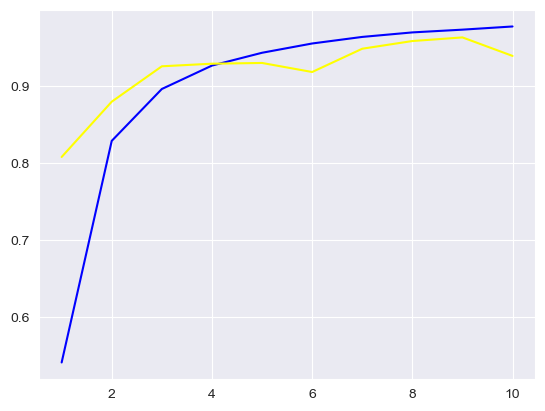

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history["accuracy"], color = "blue", label = "training accuracy")
plt.plot(epochs,training_history.history["val_accuracy"], color = "yellow", label = "validation accuracy")
plt.show()

In [32]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Cinnamon healthy',
 'Cinnamon leaf spot',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tea algal leaf',
 'Tea antrhacnose',
 'Tea bird eye spot',
 'Tea brown blight',
 'Tea gray light',
 'Tea healthy',
 'Tea red

In [33]:
test_set =  tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 18693 files belonging to 48 classes.


In [35]:
yPred = model.predict(test_set)
yPred, yPred.shape

585/585 [==============================] - 87s 148ms/step


(array([[1.00000000e+00, 3.48666408e-11, 8.22075741e-12, ...,
         8.73452786e-19, 1.13393055e-16, 3.74577325e-17],
        [1.00000000e+00, 2.82000187e-11, 1.47126804e-13, ...,
         1.40241937e-24, 2.95499913e-18, 1.29558395e-21],
        [1.00000000e+00, 3.94611982e-10, 1.03974294e-10, ...,
         1.25517896e-18, 3.25139865e-14, 9.49226117e-15],
        ...,
        [1.86166071e-05, 3.48359528e-08, 3.22091000e-05, ...,
         6.93559770e-08, 1.76190338e-06, 9.97720540e-01],
        [3.65179387e-10, 1.14822079e-13, 1.34289039e-07, ...,
         7.12507137e-11, 2.05291395e-10, 9.99998450e-01],
        [1.13837420e-13, 2.38919275e-16, 7.60709343e-11, ...,
         8.04823432e-15, 3.23598331e-12, 9.99999642e-01]], dtype=float32),
 (18693, 48))

In [36]:
predictedCategories = tf.argmax(yPred, axis=1)

In [37]:
predictedCategories

<tf.Tensor: shape=(18693,), dtype=int64, numpy=array([ 0,  0,  0, ..., 47, 47, 47], dtype=int64)>

In [38]:
trueCategories = tf.concat([y for x,y in test_set],axis = 0)
trueCategories

<tf.Tensor: shape=(18693, 48), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [39]:
yTrue = tf.argmax(trueCategories,axis=1)
yTrue

<tf.Tensor: shape=(18693,), dtype=int64, numpy=array([ 0,  0,  0, ..., 47, 47, 47], dtype=int64)>

In [40]:
from sklearn.metrics import classification_report

In [41]:
classification_report(yTrue, predictedCategories, target_names= class_name)

'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       0.90      0.97      0.94       504\n                                 Apple___Black_rot       0.97      0.98      0.98       497\n                          Apple___Cedar_apple_rust       0.95      0.97      0.96       440\n                                   Apple___healthy       0.97      0.94      0.95       502\n                               Blueberry___healthy       0.90      0.98      0.94       454\n          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421\n                 Cherry_(including_sour)___healthy       0.99      0.96      0.97       456\n                                  Cinnamon healthy       0.80      0.76      0.78       131\n                                Cinnamon leaf spot       0.81      0.64      0.71        85\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.88      